# Feature Manipulation in Pandas

Here let's look at a different dataset that will allow us to really dive into some meaningful visualizations. This data set is publically available, but it is also part of a Kaggle competition.

You can get the data from here: https://www.kaggle.com/c/titanic-gettingStarted or you can use the code below to load the data from GitHub.

There are lots of iPython notebooks for looking at the Titanic data. Check them out and see if you like any better than this one!

In [1]:
# load the Titanic dataset
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/eclarson/DataMiningNotebooks/master/data/titanic.csv') # read in the csv file

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
print(df.dtypes)
print('===========')
print(df.info())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [4]:
# the percentage of individuals that survived on the titanic
sum(df.Survived==1)/len(df)*100.0

38.383838383838381

In [5]:
# Lets aggregate by class and count survival rates
df_grouped = df.groupby(by='Pclass')
for val,grp in df_grouped:
    print('There were',len(grp),'people traveling in',val,'class.')

There were 216 people traveling in 1 class.
There were 184 people traveling in 2 class.
There were 491 people traveling in 3 class.


In [6]:
print(df_grouped.Survived.sum())
print('---------------------------------------')
print(df_grouped.Survived.count())
print('---------------------------------------')
print(df_grouped.Survived.sum() / df_grouped.Survived.count())

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
---------------------------------------
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
---------------------------------------
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [7]:
# let's clean the dataset a little before moving on

# 1. Remove attributes that just arent useful for us
for col in ['PassengerId','Name','Cabin','Ticket']:
    if col in df:
        del df[col]

# 2. Impute some missing values, grouped by their Pclass and SibSp numbers
df_grouped = df.groupby(by=['Pclass','SibSp'])
print (df_grouped.describe())

                           Age        Fare       Parch    Survived
Pclass SibSp                                                      
1      0     count  113.000000  137.000000  137.000000  137.000000
             mean    39.181416   75.223356    0.270073    0.562044
             std     14.844591   87.103081    0.575270    0.497956
             min      4.000000    0.000000    0.000000    0.000000
             25%     28.000000   27.720800    0.000000    0.000000
             50%     37.000000   39.600000    0.000000    1.000000
             75%     50.000000   80.000000    0.000000    1.000000
             max     80.000000  512.329200    2.000000    1.000000
       1     count   65.000000   71.000000   71.000000   71.000000
             mean    37.414154   88.492021    0.422535    0.746479
             std     14.690355   40.307129    0.786711    0.438123
             min      0.920000   39.600000    0.000000    0.000000
             25%     28.000000   56.414600    0.000000    0.50

In [8]:
# now use this grouping to fill the data set in each group, then transform back
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
col_deleted = list( set(df.columns) - set(df_imputed.columns)) # in case the median operation deleted columns
df_imputed[col_deleted] = df[col_deleted]

print (df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Age         884 non-null float64
Parch       891 non-null int64
Fare        891 non-null float64
Sex         891 non-null object
SibSp       891 non-null int64
Pclass      891 non-null int64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


In [9]:
# 4. drop rows that still had missing values after grouped imputation
df_imputed.dropna(inplace=True)

# 5. Rearrange the columns
df_imputed = df_imputed[['Survived','Age','Sex','Parch','SibSp','Pclass','Fare','Embarked']]

print (df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 8 columns):
Survived    882 non-null int64
Age         882 non-null float64
Sex         882 non-null object
Parch       882 non-null int64
SibSp       882 non-null int64
Pclass      882 non-null int64
Fare        882 non-null float64
Embarked    882 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.0+ KB
None


## Feature Discretization

In [10]:
# let's break up the age variable
df_imputed['age_range'] = pd.cut(df_imputed.Age,[0,16,30,65,1e6],3,
                                 labels=['child','young adult','adult','senior']) # this creates a new variable
df_imputed.age_range.describe()

count             882
unique              4
top       young adult
freq              445
Name: age_range, dtype: object

In [11]:
# now lets group with the new variable
df_grouped = df_imputed.groupby(by=['Pclass','age_range'])
print ("Percentage of survivors in each group:")
print (df_grouped.Survived.sum() / df_grouped.Survived.count() *100)

Percentage of survivors in each group:
Pclass  age_range  
1       child          88.888889
        young adult    73.076923
        adult          58.389262
        senior         25.000000
2       child          90.476190
        young adult    41.860465
        adult          42.666667
        senior          0.000000
3       child          37.837838
        young adult    24.429967
        adult          15.841584
        senior          0.000000
Name: Survived, dtype: float64


# Visualization in Python with Pandas, Matplotlib, and Others

In [12]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 
# could also say matplotlib notebook here to make things interactive

## Visualizing the dataset

Pandas has plenty of plotting abilities built in. Let's take a look at a few of the different graphing capabilities of Pandas with only matplotlib. Afterward, we can make the visualizations more beautiful.

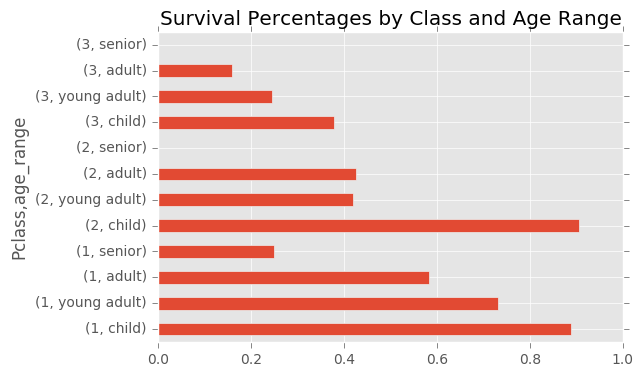

In [13]:
# Start by just plotting what we previsously grouped!
plt.style.use('ggplot')

df_grouped = df_imputed.groupby(by=['Pclass','age_range'])
survival_rate = df_grouped.Survived.sum() / df_grouped.Survived.count()
ax = survival_rate.plot(kind='barh')
plt.title('Survival Percentages by Class and Age Range')

Survived            False  True 
Pclass age_range                
1      child            1      8
       young adult     14     38
       adult           62     87
       senior           3      1
2      child            2     19
       young adult     50     36
       adult           43     32
       senior           2      0
3      child           46     28
       young adult    232     75
       adult           85     16
       senior           2      0


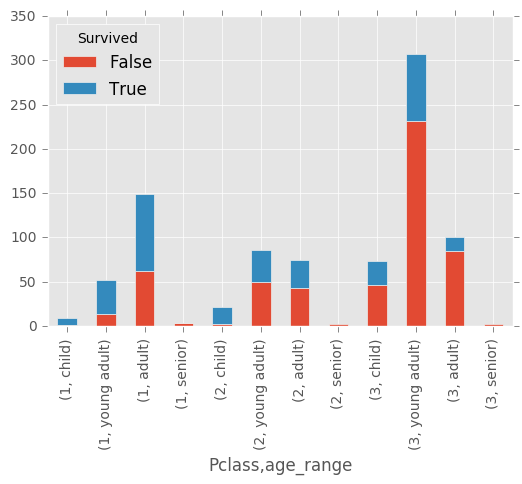

In [14]:
# the cross tab operator provides an easy way to get these numbers
survival = pd.crosstab([df_imputed['Pclass'],
                        df_imputed['age_range']], 
                       df_imputed.Survived.astype(bool))
print(survival)

survival.plot(kind='bar', stacked=True)

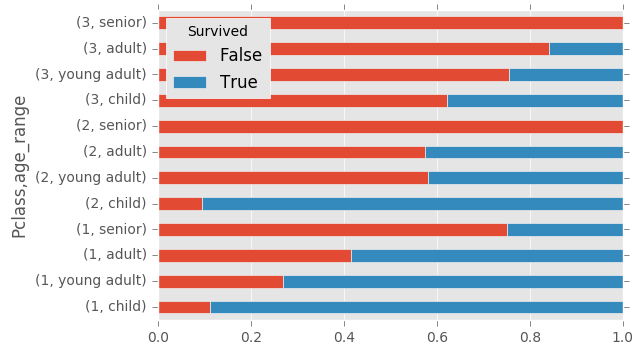

In [15]:
survival_rate = survival.div(survival.sum(1).astype(float),
                             axis=0) # normalize the value

# print survival_rate
survival_rate.plot(kind='barh', 
                   stacked=True)

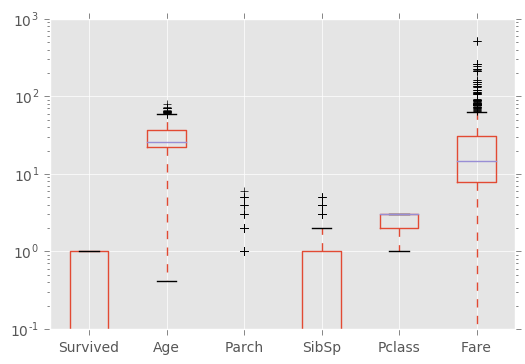

In [16]:
# pandas has some really powerful extensions to matplotlib for scientific computing 
ax = df_imputed.boxplot() # not a great plot because of the dynamic range issues
ax.set_yscale('log')

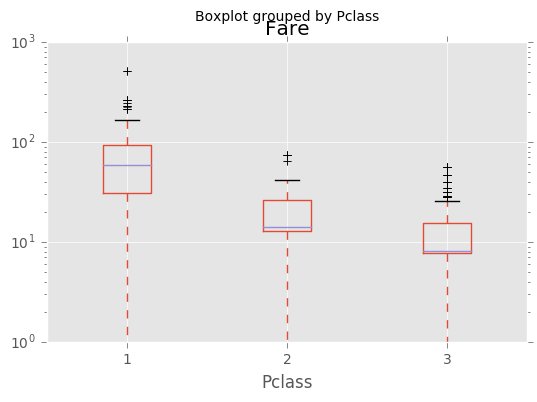

In [17]:
ax = df_imputed.boxplot(column='Fare', by = 'Pclass') # group by class
ax.set_yscale('log')

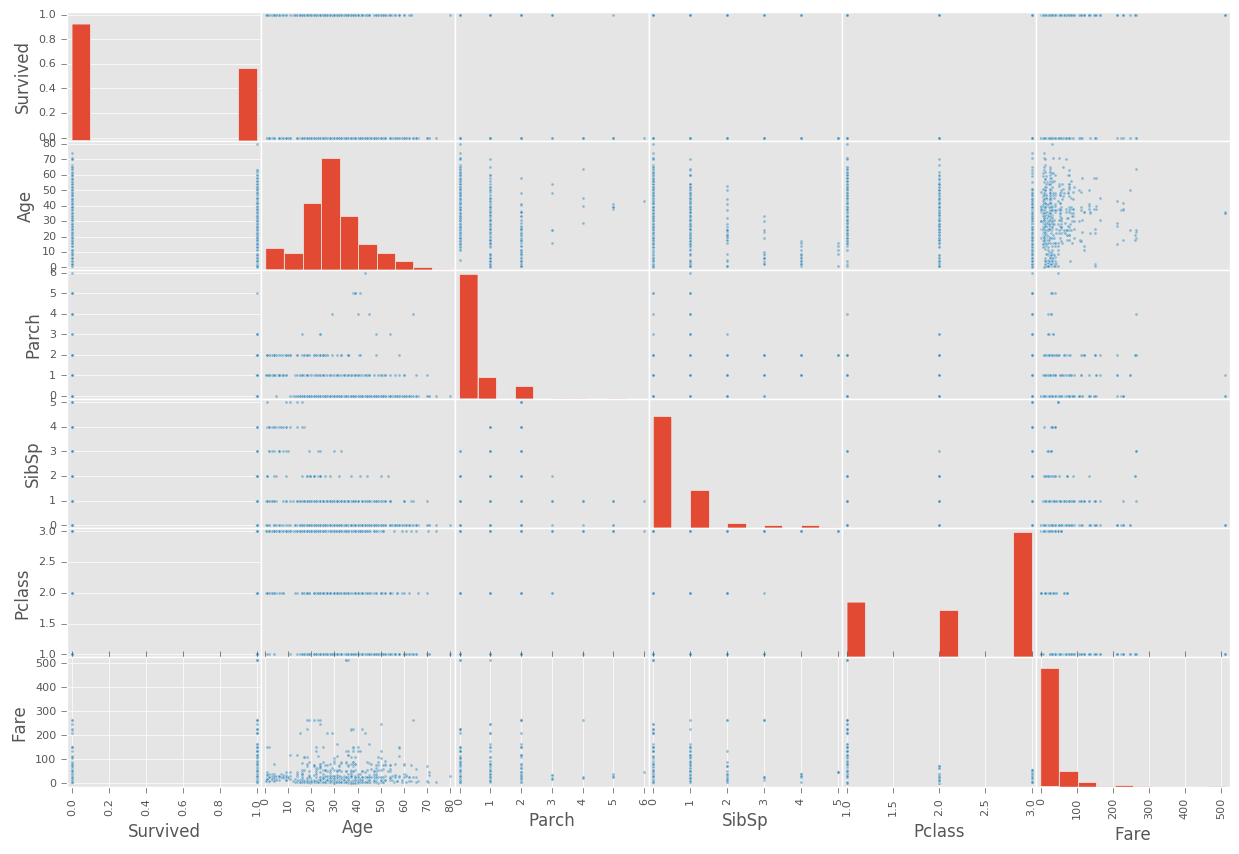

In [18]:
from pandas.tools.plotting import scatter_matrix

# not a good plot, it needs jitter to make the categorical attributes better visualized
ax = scatter_matrix(df_imputed,figsize=(15, 10))

# also we need some type of subset selection, this is just too much data

# Simplifying with Seaborn
Now let's take a look at what we get from our previous import statement: 
+ `import seaborn as sns` 


In [19]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# now try plotting some of the previous plots, way more visually appealing!!

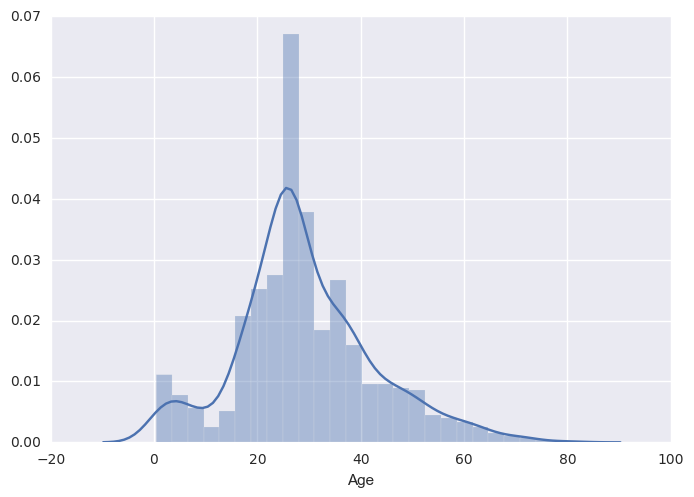

In [20]:
sns.distplot(df_imputed.Age)

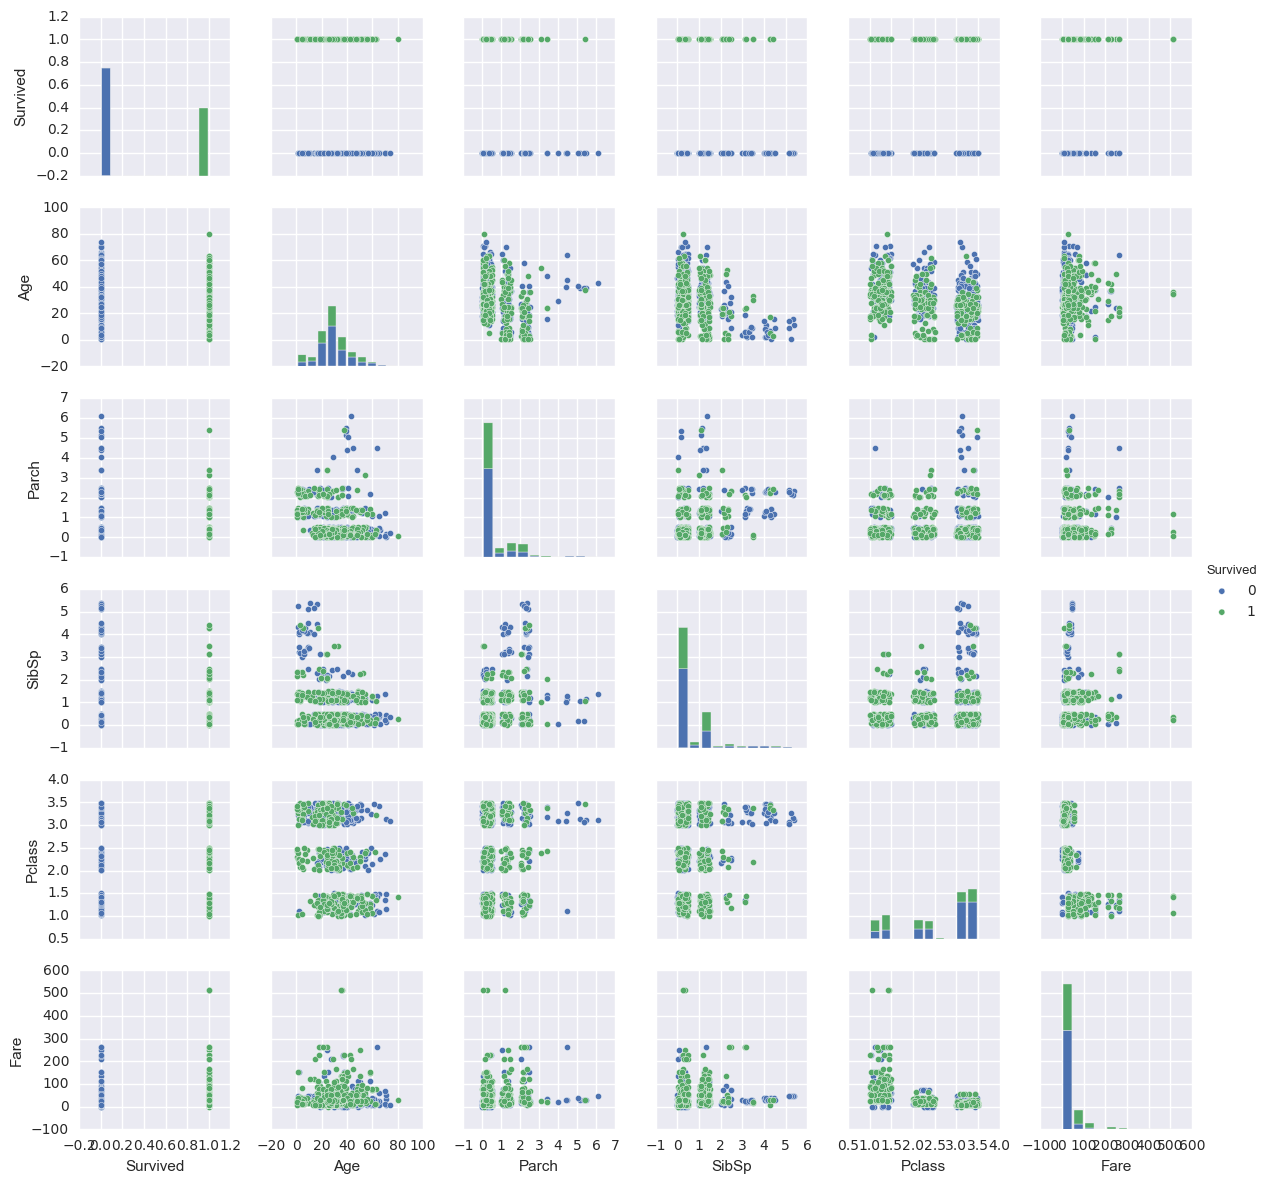

In [21]:
df_imputed_jitter = df_imputed.copy()
df_imputed_jitter[['Parch','SibSp','Pclass']] = df_imputed_jitter[['Parch','SibSp','Pclass']].values + np.random.rand(len(df_imputed_jitter),3)/2 
sns.pairplot(df_imputed_jitter, hue="Survived", size=2)

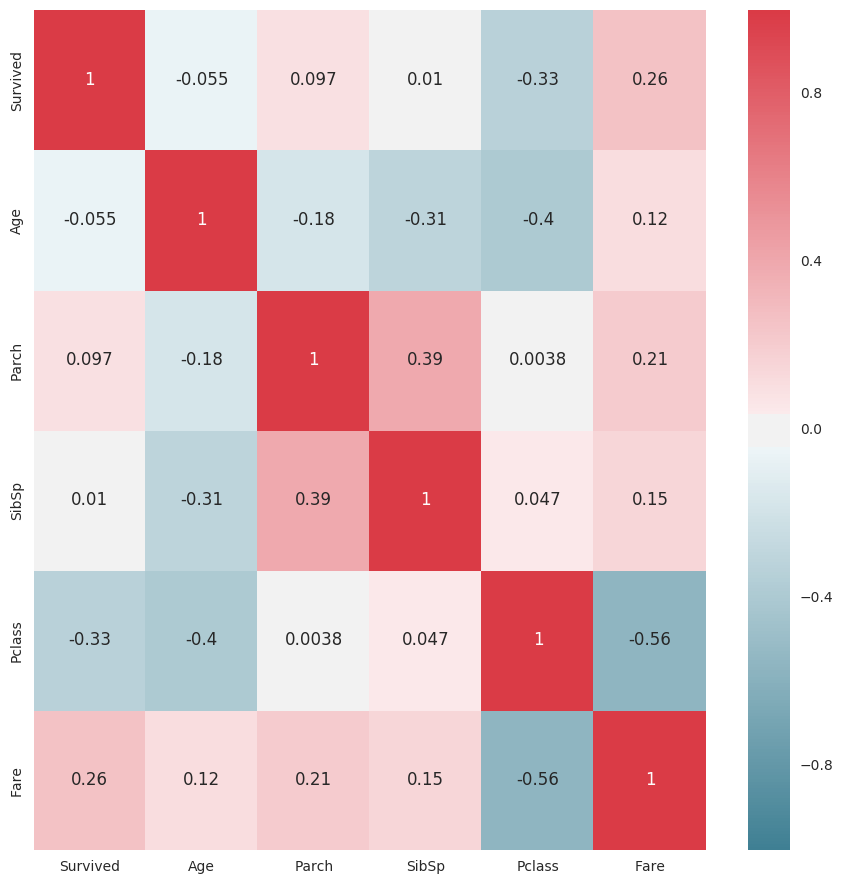

In [22]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_imputed.corr(), cmap=cmap, annot=True)

f.tight_layout()

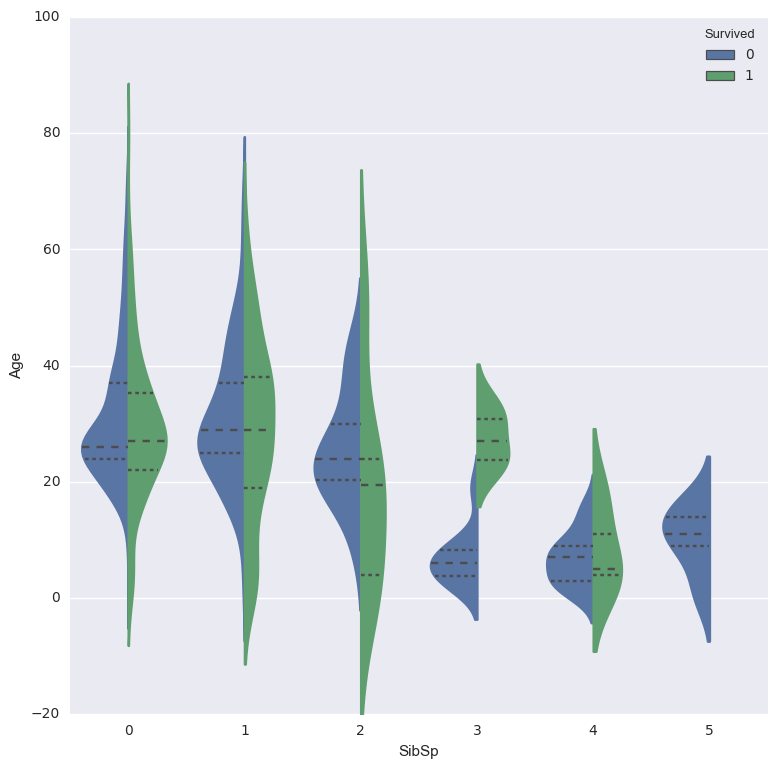

In [23]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="SibSp", y="Age", hue="Survived", data=df_imputed, 
               split=True, inner="quart")


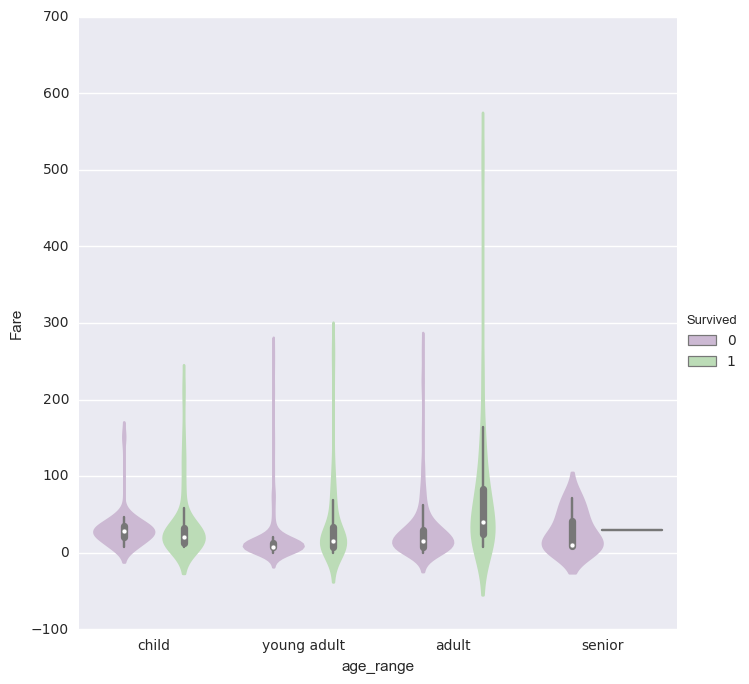

In [24]:
# this generic plotting for categorically grouped data
sns.factorplot(x='age_range',y='Fare',hue='Survived',data=df_imputed, 
               kind='violin', # other options: violin, bar, box, and others 
               palette='PRGn',
               size=7,ci=95)

# Update: Using the now open source version of Plotly
- https://plot.ly/python/getting-started/

More updates to come to this section of the notebook. Plotly is a major step in the direction of using JavaScript and python together and I would argue it has a much better implementation than other packages. 

In [25]:
# directly from the getting started example...
import plotly
print (plotly.__version__)            # version 1.9.x required
plotly.offline.init_notebook_mode() # run at the start of every notebook
plotly.offline.iplot({
    "data": [{
        "x": [1, 2, 3],
        "y": [4, 2, 5]
    }],
    "layout": {
        "title": "hello world"
    }
})

1.12.9


In [26]:
from plotly.graph_objs import Scatter, Marker, Layout, XAxis, YAxis
# let's manipulate the example to serve our purposes
plotly.offline.iplot({
    'data':[
        Scatter(x=df_imputed.SibSp.values+np.random.rand(*df_imputed.SibSp.shape)/5,
                y=df_imputed.Age,
                text=df_imputed.Survived.values.astype(str),
                marker=Marker(size=df_imputed.Fare, sizemode='area', sizeref=1,),
                mode='markers')
            ],
    'layout': Layout(xaxis=XAxis(title='Sibling and Spouses'), yaxis=YAxis(title='Age'))
}, show_link=False)

Visualizing more than three attributes requires a good deal of thought. In the following graph, lets use interactivity to help bolster the analysis. We will create a graph with custom text overlays that help refine the passenger we are looking at. We will 
- color code whether they survived
- Scatter plot Age and Social class
- Code the number of siblings/spouses traveling with them through the size of the marker

In [32]:
def get_text(df_row):
    return 'Age: %d<br>Class: %d<br>Fare: %.2f<br>SibSpouse: %d<br>ParChildren: %d'%(df_row.Age,df_row.Pclass,df_row.Fare,df_row.SibSp,df_row.Parch)

df_imputed['text'] = df_imputed.apply(get_text,axis=1)
textstring = ['Perished','Survived', ]

plotly.offline.iplot({
    'data': [
        Scatter(x=df_imputed.Pclass[df_imputed.Survived==val].values+np.random.rand(*df_imputed.SibSp[df_imputed.Survived==val].shape)/2,
                y=df_imputed.Age[df_imputed.Survived==val],
                text=df_imputed.text[df_imputed.Survived==val].values.astype(str),
                marker=Marker(size=df_imputed[df_imputed.Survived==val].SibSp, sizemode='area', sizeref=0.01,),
                mode='markers',
                name=textstring[val]) for val in [0,1]
    ],
    'layout': Layout(xaxis=XAxis(title='Class'), yaxis=YAxis(title='Age'),
                     title='Age and Class Scatter Plot, Size = number of siblings and spouses'),
    
}, show_link=False)

Check more about using plotly here:
- https://plot.ly/python/ipython-notebook-tutorial/ 

# Seaborn, Matplotlib, and Plotly
If we can capture the matplotlib figure, then we can usually export it to plotly, like so:

In [28]:
from plotly.offline import iplot_mpl

fig = plt.figure()

sns.set_palette("hls")
sns.distplot(df_imputed.Age);

iplot_mpl(fig, strip_style = False) 

### But it can't do everything...

In [29]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="SibSp", y="Age", hue="Survived", data=df_imputed, 
               split=True, inner="quart")

iplot_mpl(f) 

/Users/eclarson/anaconda/envs/MLEnv/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.

/Users/eclarson/anaconda/envs/MLEnv/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:445: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates

